### QED-C Prototype Benchmarks - Qiskit Version
The notebook contains a suite of prototype application benchmarks for the IBM Qiskit API.
Configure and run the cell below with the desired execution settings.
Then execute the remaining cells, each containing one prototype benchmark program.

In [1]:
min_qubits=2
max_qubits=8
skip_qubits=1
max_circuits=3
num_shots=1000

backend_id="qasm_simulator"
hub="ibm-q"; group="open"; project="main"
provider_backend = None
exec_options = None

# # *** If using IBMQ hardware, run this once to authenticate
# from qiskit import IBMQ
# IBMQ.save_account('YOUR_API_TOKEN_HERE')

# # *** If you are part of an IBMQ group, set hub, group, and project name here
# hub="YOUR_HUB_NAME"
# group="YOUR_GROUP_NAME"
# project="YOUR_PROJECT_NAME"

# # *** This example shows how to specify the backend using a known "backend_id"
# # Use 'sabre' layout for IBM backends
# exec_options = { "optimization_level":3, "layout_method":'sabre', "routing_method":'sabre',
#                  "use_sessions":True, "resilience_level":1}
# backend_id="ibmq_belem"

# # *** Here's an example of using a typical custom provider backend (e.g. AQT simulator)
# import os
# from qiskit_aqt_provider import AQTProvider
# provider = AQTProvider(os.environ.get('AQT_ACCESS_KEY'))    # get your key from environment
# provider_backend = provider.backends.aqt_qasm_simulator_noise_1
# backend_id="aqt_qasm_simulator_noise_1"

# # An example using IonQ provider
# from qiskit_ionq import IonQProvider
# provider = IonQProvider()   # Be sure to set the QISKIT_IONQ_API_TOKEN environment variable
# provider_backend = provider.get_backend("ionq_qpu")
# backend_id="ionq_qpu"


### Additional Options for Running on BlueQubit
The options in the cell below can be used to enable useful tracing options, for viewing timing information and for controlling the execution in ways that are appropriate for this larger scale simulator.

In [2]:
# To enable BlueQubit execution with several options for testing

# An example using BlueQubit provider (backend_id=CPU/QPU, device=cpu/qpu)
import os, bluequbit, _common.executors.bluequbit_executor as bluequbit_executor
provider_backend = bluequbit.init()
backend_id="BlueQubit-CPU"
exec_options = { "executor": bluequbit_executor.run, "device":'cpu' }

# Set True to enable verbose trace of BlueQubit executor
bluequbit_executor.verbose=False

# Since this is a state vector simulator, there isn't a real need to average over multiple circuits
# (except in cases where results will vary greatly with the values of the random inputs)
max_circuits=1

# It is also useful to skip every other qubit width since many more qubits can be tested
skip_qubits=2

import sys
sys.path.insert(1, "_common")
sys.path.insert(1, "_common/qiskit")

# Set these True to enable verbose and verbose_time execution
import execute
execute.verbose=False
execute.verbose_time=False

# Set False to disable calculation of 'normalized depth' (long time for large circuits)
# (if False, only 'algorithmic' depth will be displayed in plots)
execute.use_normalized_depth = True

# Set True to include elapsed time in metrics plots
import metrics
metrics.show_elapsed_times = True

# Enable larger # qubits for some circuits

sys.path.insert(1, "amplitude-estimation/qiskit")
import ae_benchmark
ae_benchmark.MAX_QUBITS=12

sys.path.insert(1, "grovers/qiskit")
import grovers_benchmark
grovers_benchmark.MAX_QUBITS=12


BQ-PYTHON-SDK - WARNING - Development version 0.4.0b1 of BlueQubit Python SDK is being used


In [3]:
# Custom optimization options can be specified in this cell (below is an example)

# # Example of pytket Transformer
# import _common.transformers.tket_optimiser as tket_optimiser
# exec_options = { "optimization_level": 3, "layout_method":'sabre', "routing_method":'sabre', "transformer": tket_optimiser.high_optimisation }

# # Define a custom noise model to be used during execution
# import _common.custom.custom_qiskit_noise_model as custom_qiskit_noise_model
# exec_options = { "noise_model": custom_qiskit_noise_model.my_noise_model() }

# # Example of mthree error mitigation
# import _common.postprocessors.mthree.mthree_em as mthree_em
# exec_options = { "optimization_level": 3, "layout_method":'sabre', "routing_method":'sabre',
#                         "postprocessor": mthree_em.get_mthree_handlers(backend_id, provider_backend) }

# # Example of a custom Executor (BlueQubit)
# import _common.executors.bluequbit_executor as bluequbit_executor
# exec_options = { "executor": bluequbit_executor.run, "device":'cpu' }


### Deutsch-Jozsa

Deutsch-Jozsa Benchmark Program - Qiskit
2
... execution starting at Aug 28, 2023 19:18:38 UTC
************
Executing [1] circuits with num_qubits = 3


BQ-PYTHON-SDK - INFO - Submitted: Job ID: FQn105fmQoHLoXQG, device: cpu, run status: RUNNING, created on: 2023-08-28 19:18:37 UTC, estimated runtime: 100 ms, estimated cost: $0.00, num qubits: 3
INFO:bluequbit-python-sdk:Submitted: Job ID: FQn105fmQoHLoXQG, device: cpu, run status: RUNNING, created on: 2023-08-28 19:18:37 UTC, estimated runtime: 100 ms, estimated cost: $0.00, num qubits: 3


************
Average Circuit Algorithmic Depth, ξ (xi) for the 3 qubit group = 5, 0.0
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 3 qubit group = 5, 0.0, 0.0
Average Creation, Elapsed, Execution Time for the 3 qubit group = 0.001, 0.4, 0.004 secs
Average Hellinger, Normalized Fidelity for the 3 qubit group = 1.0, 1.0

************
Executing [1] circuits with num_qubits = 5


BQ-PYTHON-SDK - INFO - Submitted: Job ID: nqSd0hUz58ParAj1, device: cpu, run status: RUNNING, created on: 2023-08-28 19:18:38 UTC, estimated runtime: 100 ms, estimated cost: $0.00, num qubits: 5
INFO:bluequbit-python-sdk:Submitted: Job ID: nqSd0hUz58ParAj1, device: cpu, run status: RUNNING, created on: 2023-08-28 19:18:38 UTC, estimated runtime: 100 ms, estimated cost: $0.00, num qubits: 5


************
Average Circuit Algorithmic Depth, ξ (xi) for the 5 qubit group = 6, 0.0
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 5 qubit group = 6, 0.0, 0.0
Average Creation, Elapsed, Execution Time for the 5 qubit group = 0.001, 0.378, 0.004 secs
Average Hellinger, Normalized Fidelity for the 5 qubit group = 1.0, 1.0

************
Executing [1] circuits with num_qubits = 7


BQ-PYTHON-SDK - INFO - Submitted: Job ID: 83Fa87o9tBhiE2Dw, device: cpu, run status: RUNNING, created on: 2023-08-28 19:18:38 UTC, estimated runtime: 100 ms, estimated cost: $0.00, num qubits: 7
INFO:bluequbit-python-sdk:Submitted: Job ID: 83Fa87o9tBhiE2Dw, device: cpu, run status: RUNNING, created on: 2023-08-28 19:18:38 UTC, estimated runtime: 100 ms, estimated cost: $0.00, num qubits: 7


************
Average Circuit Algorithmic Depth, ξ (xi) for the 7 qubit group = 6, 0.0
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 7 qubit group = 6, 0.0, 0.0
Average Creation, Elapsed, Execution Time for the 7 qubit group = 0.001, 0.363, 0.006 secs
Average Hellinger, Normalized Fidelity for the 7 qubit group = 1.0, 1.0

... execution complete at Aug 28, 2023 19:18:39 UTC in 1.273 secs

Sample Circuit:
      ┌───┐      ░ ┌─────┐ ░ ┌───┐      ░ ┌─┐         
q5_0: ┤ H ├──────░─┤0    ├─░─┤ H ├──────░─┤M├─────────
      ├───┤      ░ │     │ ░ ├───┤      ░ └╥┘┌─┐      
q5_1: ┤ H ├──────░─┤1    ├─░─┤ H ├──────░──╫─┤M├──────
      ├───┤      ░ │     │ ░ ├───┤      ░  ║ └╥┘┌─┐   
q5_2: ┤ H ├──────░─┤2 Uf ├─░─┤ H ├──────░──╫──╫─┤M├───
      ├───┤      ░ │     │ ░ ├───┤      ░  ║  ║ └╥┘┌─┐
q5_3: ┤ H ├──────░─┤3    ├─░─┤ H ├──────░──╫──╫──╫─┤M├
      ├───┤┌───┐ ░ │     │ ░ ├───┤┌───┐ ░  ║  ║  ║ └╥┘
q5_4: ┤ X ├┤ H ├─░─┤4    ├─░─┤ H ├┤ X ├─░──╫──╫──╫──╫─
      └───┘└───┘ ░ └─────┘ 

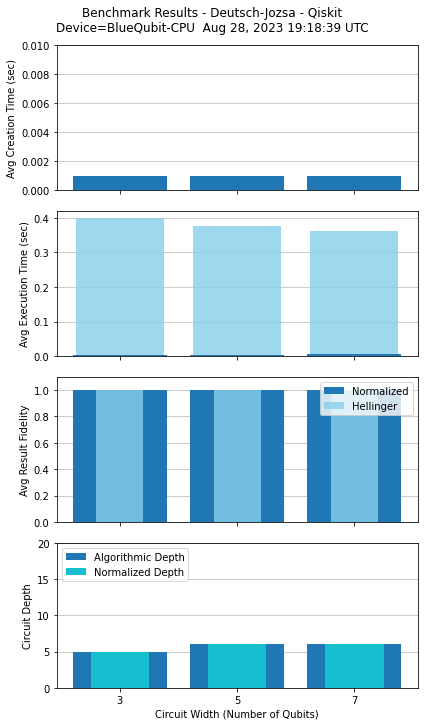

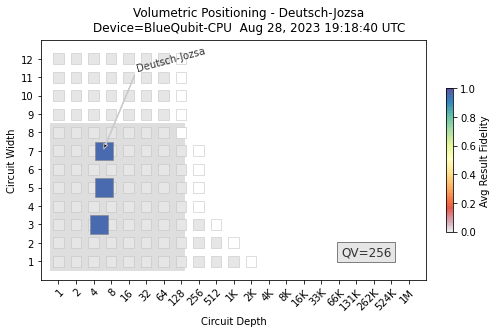

In [4]:
import sys
sys.path.insert(1, "deutsch-jozsa/qiskit")
import dj_benchmark
dj_benchmark.run(min_qubits=min_qubits, max_qubits=max_qubits, skip_qubits=skip_qubits,
                max_circuits=max_circuits, num_shots=num_shots,
                backend_id=backend_id, provider_backend=provider_backend,
                hub=hub, group=group, project=project, exec_options=exec_options)

### Bernstein-Vazirani - Method 1

Bernstein-Vazirani Benchmark Program - Qiskit
... execution starting at Aug 28, 2023 19:18:41 UTC
************
Executing [1] circuits with num_qubits = 3


BQ-PYTHON-SDK - INFO - Submitted: Job ID: uvQt0gmdsq3VQGXD, device: cpu, run status: RUNNING, created on: 2023-08-28 19:18:41 UTC, estimated runtime: 100 ms, estimated cost: $0.00, num qubits: 3
INFO:bluequbit-python-sdk:Submitted: Job ID: uvQt0gmdsq3VQGXD, device: cpu, run status: RUNNING, created on: 2023-08-28 19:18:41 UTC, estimated runtime: 100 ms, estimated cost: $0.00, num qubits: 3


************
Average Circuit Algorithmic Depth, ξ (xi) for the 3 qubit group = 6, 0.111
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 3 qubit group = 6, 0.091, 1.0
Average Creation, Elapsed, Execution Time for the 3 qubit group = 0.0, 0.604, 0.004 secs
Average Hellinger, Normalized Fidelity for the 3 qubit group = 1.0, 1.0

************
Executing [1] circuits with num_qubits = 5


BQ-PYTHON-SDK - INFO - Submitted: Job ID: WOViWx17cl0eMW2H, device: cpu, run status: RUNNING, created on: 2023-08-28 19:18:41 UTC, estimated runtime: 100 ms, estimated cost: $0.00, num qubits: 5
INFO:bluequbit-python-sdk:Submitted: Job ID: WOViWx17cl0eMW2H, device: cpu, run status: RUNNING, created on: 2023-08-28 19:18:41 UTC, estimated runtime: 100 ms, estimated cost: $0.00, num qubits: 5


************
Average Circuit Algorithmic Depth, ξ (xi) for the 5 qubit group = 7, 0.143
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 5 qubit group = 7, 0.1, 2.0
Average Creation, Elapsed, Execution Time for the 5 qubit group = 0.001, 0.43, 0.005 secs
Average Hellinger, Normalized Fidelity for the 5 qubit group = 1.0, 1.0

************
Executing [1] circuits with num_qubits = 7


BQ-PYTHON-SDK - INFO - Submitted: Job ID: zUy6UTsQ9OJFHZod, device: cpu, run status: RUNNING, created on: 2023-08-28 19:18:42 UTC, estimated runtime: 100 ms, estimated cost: $0.00, num qubits: 7
INFO:bluequbit-python-sdk:Submitted: Job ID: zUy6UTsQ9OJFHZod, device: cpu, run status: RUNNING, created on: 2023-08-28 19:18:42 UTC, estimated runtime: 100 ms, estimated cost: $0.00, num qubits: 7


************
Average Circuit Algorithmic Depth, ξ (xi) for the 7 qubit group = 8, 0.158
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 7 qubit group = 8, 0.103, 3.0
Average Creation, Elapsed, Execution Time for the 7 qubit group = 0.001, 0.327, 0.006 secs
Average Hellinger, Normalized Fidelity for the 7 qubit group = 1.0, 1.0

... execution complete at Aug 28, 2023 19:18:43 UTC in 1.416 secs

Sample Circuit:
       ┌───┐      ░ ┌─────┐ ░ ┌───┐      ░ ┌─┐         
q24_0: ┤ H ├──────░─┤0    ├─░─┤ H ├──────░─┤M├─────────
       ├───┤      ░ │     │ ░ ├───┤      ░ └╥┘┌─┐      
q24_1: ┤ H ├──────░─┤1    ├─░─┤ H ├──────░──╫─┤M├──────
       ├───┤      ░ │     │ ░ ├───┤      ░  ║ └╥┘┌─┐   
q24_2: ┤ H ├──────░─┤2 Uf ├─░─┤ H ├──────░──╫──╫─┤M├───
       ├───┤      ░ │     │ ░ ├───┤      ░  ║  ║ └╥┘┌─┐
q24_3: ┤ H ├──────░─┤3    ├─░─┤ H ├──────░──╫──╫──╫─┤M├
       ├───┤┌───┐ ░ │     │ ░ ├───┤┌───┐ ░  ║  ║  ║ └╥┘
q24_4: ┤ X ├┤ H ├─░─┤4    ├─░─┤ H ├┤ X ├─░──╫──╫──╫──╫─
       └───┘└

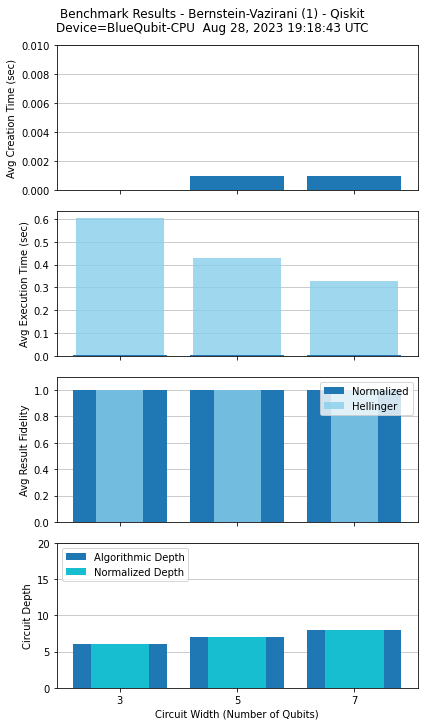

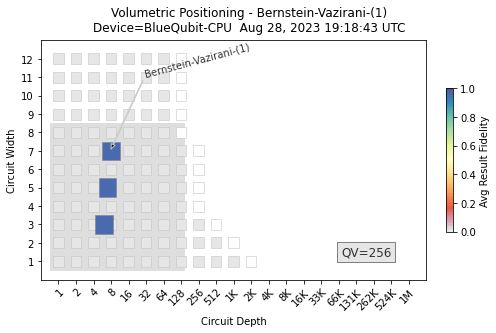

In [5]:
import sys
sys.path.insert(1, "bernstein-vazirani/qiskit")
import bv_benchmark
bv_benchmark.run(min_qubits=min_qubits, max_qubits=max_qubits, skip_qubits=skip_qubits,
                max_circuits=max_circuits, num_shots=num_shots,
                method=1,
                backend_id=backend_id, provider_backend=provider_backend,
                hub=hub, group=group, project=project, exec_options=exec_options)

### Bernstein-Vazirani - Method 2

In [6]:
import sys
sys.path.insert(1, "bernstein-vazirani/qiskit")
import bv_benchmark
bv_benchmark.run(min_qubits=min_qubits, max_qubits=max_qubits, skip_qubits=skip_qubits,
                max_circuits=max_circuits, num_shots=num_shots,
                method=2,
                backend_id=backend_id, provider_backend=provider_backend,
                hub=hub, group=group, project=project, exec_options=exec_options)

Bernstein-Vazirani Benchmark Program - Qiskit
... execution starting at Aug 28, 2023 19:18:44 UTC
************
Executing [1] circuits with num_qubits = 3
ERROR: Failed to execute circuit 3 2
... exception = Job F7cJWrE1QNYbgW2K finished with status: FAILED_VALIDATION. Mid-circuit measurements are not supported. See https://app.bluequbit.io/docs for more details.
************
Executing [1] circuits with num_qubits = 5
ERROR: Failed to execute circuit 5 8
... exception = Job 0U0IP4EPOPYyEC3s finished with status: FAILED_VALIDATION. Mid-circuit measurements are not supported. See https://app.bluequbit.io/docs for more details.
************
Executing [1] circuits with num_qubits = 7
ERROR: Failed to execute circuit 7 7
... exception = Job nLPK6TTUsiGML41n finished with status: FAILED_VALIDATION. Mid-circuit measurements are not supported. See https://app.bluequbit.io/docs for more details.
... execution complete at Aug 28, 2023 19:18:45 UTC in 0.61 secs

Sample Circuit:
                  ░

### Hidden Shift

Hidden Shift Benchmark Program - Qiskit
... execution starting at Aug 28, 2023 19:18:45 UTC
************
Executing [1] circuits with num_qubits = 2


BQ-PYTHON-SDK - INFO - Submitted: Job ID: w67GNGDXesuYuWgQ, device: cpu, run status: RUNNING, created on: 2023-08-28 19:18:44 UTC, estimated runtime: 100 ms, estimated cost: $0.00, num qubits: 2
INFO:bluequbit-python-sdk:Submitted: Job ID: w67GNGDXesuYuWgQ, device: cpu, run status: RUNNING, created on: 2023-08-28 19:18:44 UTC, estimated runtime: 100 ms, estimated cost: $0.00, num qubits: 2


************
Average Circuit Algorithmic Depth, ξ (xi) for the 2 qubit group = 8, 0.2
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 2 qubit group = 15, 0.1, 2.0
Average Creation, Elapsed, Execution Time for the 2 qubit group = 0.001, 0.365, 0.003 secs
Average Hellinger, Normalized Fidelity for the 2 qubit group = 1.0, 1.0

************
Executing [1] circuits with num_qubits = 4


BQ-PYTHON-SDK - INFO - Submitted: Job ID: DHAjFqaGOlKprSLl, device: cpu, run status: RUNNING, created on: 2023-08-28 19:18:44 UTC, estimated runtime: 100 ms, estimated cost: $0.00, num qubits: 4
INFO:bluequbit-python-sdk:Submitted: Job ID: DHAjFqaGOlKprSLl, device: cpu, run status: RUNNING, created on: 2023-08-28 19:18:44 UTC, estimated runtime: 100 ms, estimated cost: $0.00, num qubits: 4


************
Average Circuit Algorithmic Depth, ξ (xi) for the 4 qubit group = 8, 0.2
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 4 qubit group = 15, 0.1, 4.0
Average Creation, Elapsed, Execution Time for the 4 qubit group = 0.002, 0.376, 0.005 secs
Average Hellinger, Normalized Fidelity for the 4 qubit group = 1.0, 1.0

************
Executing [1] circuits with num_qubits = 6


BQ-PYTHON-SDK - INFO - Submitted: Job ID: fw6dO73Mi5ZqmE0J, device: cpu, run status: RUNNING, created on: 2023-08-28 19:18:45 UTC, estimated runtime: 100 ms, estimated cost: $0.00, num qubits: 6
INFO:bluequbit-python-sdk:Submitted: Job ID: fw6dO73Mi5ZqmE0J, device: cpu, run status: RUNNING, created on: 2023-08-28 19:18:45 UTC, estimated runtime: 100 ms, estimated cost: $0.00, num qubits: 6


************
Average Circuit Algorithmic Depth, ξ (xi) for the 6 qubit group = 8, 0.2
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 6 qubit group = 17, 0.094, 6.0
Average Creation, Elapsed, Execution Time for the 6 qubit group = 0.002, 0.582, 0.008 secs
Average Hellinger, Normalized Fidelity for the 6 qubit group = 1.0, 1.0

************
Executing [1] circuits with num_qubits = 8


BQ-PYTHON-SDK - INFO - Submitted: Job ID: zSPvCz3O5aFIVOZf, device: cpu, run status: RUNNING, created on: 2023-08-28 19:18:45 UTC, estimated runtime: 100 ms, estimated cost: $0.00, num qubits: 8
INFO:bluequbit-python-sdk:Submitted: Job ID: zSPvCz3O5aFIVOZf, device: cpu, run status: RUNNING, created on: 2023-08-28 19:18:45 UTC, estimated runtime: 100 ms, estimated cost: $0.00, num qubits: 8


************
Average Circuit Algorithmic Depth, ξ (xi) for the 8 qubit group = 8, 0.222
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 8 qubit group = 17, 0.087, 8.0
Average Creation, Elapsed, Execution Time for the 8 qubit group = 0.002, 0.365, 0.01 secs
Average Hellinger, Normalized Fidelity for the 8 qubit group = 1.0, 1.0

... execution complete at Aug 28, 2023 19:18:46 UTC in 1.791 secs

Sample Circuit:
       ┌───┐ ░ ┌─────┐ ░ ┌───┐ ░ ┌─────┐ ░ ┌───┐ ░ ┌─┐               
q75_0: ┤ H ├─░─┤0    ├─░─┤ H ├─░─┤0    ├─░─┤ H ├─░─┤M├───────────────
       ├───┤ ░ │     │ ░ ├───┤ ░ │     │ ░ ├───┤ ░ └╥┘┌─┐            
q75_1: ┤ H ├─░─┤1    ├─░─┤ H ├─░─┤1    ├─░─┤ H ├─░──╫─┤M├────────────
       ├───┤ ░ │     │ ░ ├───┤ ░ │     │ ░ ├───┤ ░  ║ └╥┘┌─┐         
q75_2: ┤ H ├─░─┤2    ├─░─┤ H ├─░─┤2    ├─░─┤ H ├─░──╫──╫─┤M├─────────
       ├───┤ ░ │  Uf │ ░ ├───┤ ░ │  Ug │ ░ ├───┤ ░  ║  ║ └╥┘┌─┐      
q75_3: ┤ H ├─░─┤3    ├─░─┤ H ├─░─┤3    ├─░─┤ H ├─░──╫──╫──╫─┤M├──────
       ├───┤ 

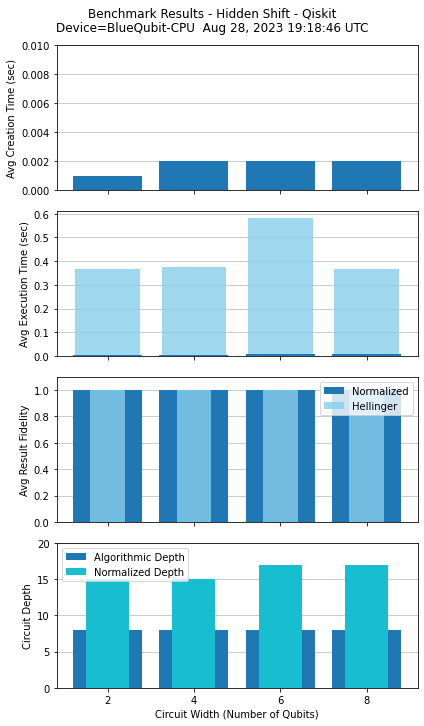

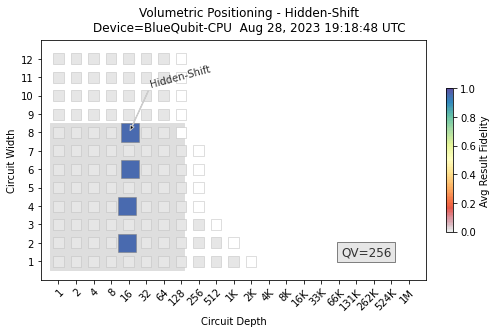

In [7]:
import sys
sys.path.insert(1, "hidden-shift/qiskit")
import hs_benchmark
hs_benchmark.run(min_qubits=min_qubits, max_qubits=max_qubits,
                max_circuits=max_circuits, num_shots=num_shots,
                backend_id=backend_id, provider_backend=provider_backend,
                hub=hub, group=group, project=project, exec_options=exec_options)

### Quantum Fourier Transform - Method 1

Quantum Fourier Transform Benchmark Program - Qiskit
... using circuit method 1
... execution starting at Aug 28, 2023 19:18:49 UTC
************
Executing [1] circuits with num_qubits = 2


BQ-PYTHON-SDK - INFO - Submitted: Job ID: tZw5vmHUtcjQDWE7, device: cpu, run status: RUNNING, created on: 2023-08-28 19:18:48 UTC, estimated runtime: 100 ms, estimated cost: $0.00, num qubits: 2
INFO:bluequbit-python-sdk:Submitted: Job ID: tZw5vmHUtcjQDWE7, device: cpu, run status: RUNNING, created on: 2023-08-28 19:18:48 UTC, estimated runtime: 100 ms, estimated cost: $0.00, num qubits: 2


... number of gates, depth = 11, 8
************
Average Circuit Algorithmic Depth, ξ (xi) for the 2 qubit group = 9, 0.222
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 2 qubit group = 18, 0.211, 4.0
Average Creation, Elapsed, Execution Time for the 2 qubit group = 0.001, 0.411, 0.004 secs
Average Hellinger, Normalized Fidelity for the 2 qubit group = 1.0, 1.0

************
Executing [1] circuits with num_qubits = 4


BQ-PYTHON-SDK - INFO - Submitted: Job ID: 7gdYUIxqhMpUK8ng, device: cpu, run status: RUNNING, created on: 2023-08-28 19:18:49 UTC, estimated runtime: 100 ms, estimated cost: $0.00, num qubits: 4
INFO:bluequbit-python-sdk:Submitted: Job ID: 7gdYUIxqhMpUK8ng, device: cpu, run status: RUNNING, created on: 2023-08-28 19:18:49 UTC, estimated runtime: 100 ms, estimated cost: $0.00, num qubits: 4


... number of gates, depth = 29, 22
************
Average Circuit Algorithmic Depth, ξ (xi) for the 4 qubit group = 23, 0.48
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 4 qubit group = 58, 0.348, 24.0
Average Creation, Elapsed, Execution Time for the 4 qubit group = 0.002, 0.388, 0.008 secs
Average Hellinger, Normalized Fidelity for the 4 qubit group = 1.0, 1.0

************
Executing [1] circuits with num_qubits = 6


BQ-PYTHON-SDK - INFO - Submitted: Job ID: irWuEYstRbJac8qF, device: cpu, run status: RUNNING, created on: 2023-08-28 19:18:49 UTC, estimated runtime: 100 ms, estimated cost: $0.00, num qubits: 6
INFO:bluequbit-python-sdk:Submitted: Job ID: irWuEYstRbJac8qF, device: cpu, run status: RUNNING, created on: 2023-08-28 19:18:49 UTC, estimated runtime: 100 ms, estimated cost: $0.00, num qubits: 6


... number of gates, depth = 58, 44
************
Average Circuit Algorithmic Depth, ξ (xi) for the 6 qubit group = 45, 0.577
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 6 qubit group = 122, 0.39, 60.0
Average Creation, Elapsed, Execution Time for the 6 qubit group = 0.003, 0.444, 0.017 secs
Average Hellinger, Normalized Fidelity for the 6 qubit group = 1.0, 1.0

************
Executing [1] circuits with num_qubits = 8


BQ-PYTHON-SDK - INFO - Submitted: Job ID: TwtZvn1BhoPcq2QB, device: cpu, run status: RUNNING, created on: 2023-08-28 19:18:50 UTC, estimated runtime: 100 ms, estimated cost: $0.00, num qubits: 8
INFO:bluequbit-python-sdk:Submitted: Job ID: TwtZvn1BhoPcq2QB, device: cpu, run status: RUNNING, created on: 2023-08-28 19:18:50 UTC, estimated runtime: 100 ms, estimated cost: $0.00, num qubits: 8


... number of gates, depth = 93, 74
************
Average Circuit Algorithmic Depth, ξ (xi) for the 8 qubit group = 75, 0.659
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 8 qubit group = 210, 0.416, 112.0
Average Creation, Elapsed, Execution Time for the 8 qubit group = 0.01, 0.555, 0.027 secs
Average Hellinger, Normalized Fidelity for the 8 qubit group = 1.0, 1.0

... execution complete at Aug 28, 2023 19:18:51 UTC in 1.953 secs

Sample Circuit:
        ┌───┐ ░ ┌──────┐ ░  ┌───────┐  ░ ┌──────────┐ ░ ┌─┐         
q100_0: ┤ X ├─░─┤0     ├─░──┤ Rz(π) ├──░─┤0         ├─░─┤M├─────────
        └───┘ ░ │      │ ░ ┌┴───────┴┐ ░ │          │ ░ └╥┘┌─┐      
q100_1: ──────░─┤1     ├─░─┤ Rz(π/2) ├─░─┤1         ├─░──╫─┤M├──────
              ░ │  qft │ ░ ├─────────┤ ░ │  inv_qft │ ░  ║ └╥┘┌─┐   
q100_2: ──────░─┤2     ├─░─┤ Rz(π/4) ├─░─┤2         ├─░──╫──╫─┤M├───
              ░ │      │ ░ ├─────────┤ ░ │          │ ░  ║  ║ └╥┘┌─┐
q100_3: ──────░─┤3     ├─░─┤ Rz(π/8) ├─░─┤3       

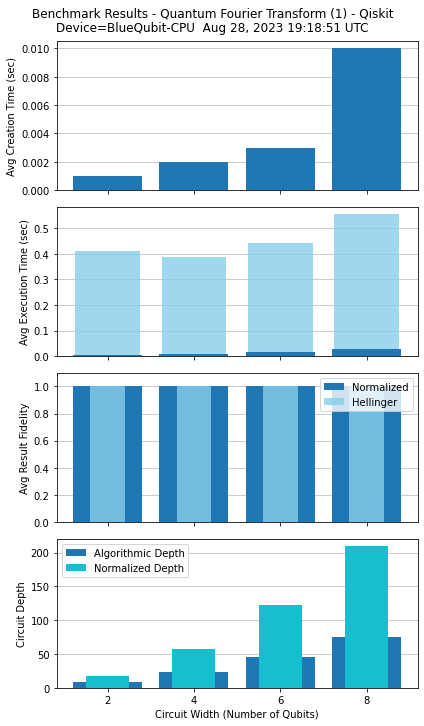

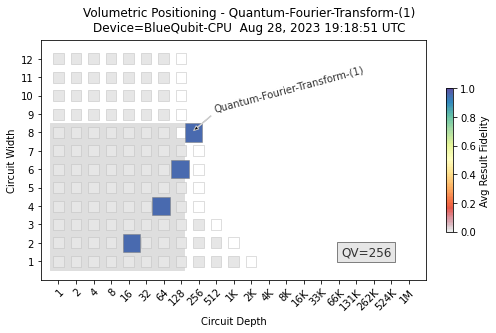

In [8]:
import sys
sys.path.insert(1, "quantum-fourier-transform/qiskit")
import qft_benchmark
qft_benchmark.run(min_qubits=min_qubits, max_qubits=max_qubits, skip_qubits=skip_qubits,
                max_circuits=max_circuits, num_shots=num_shots,
                method=1,
                backend_id=backend_id, provider_backend=provider_backend,
                hub=hub, group=group, project=project, exec_options=exec_options)

### Quantum Fourier Transform - Method 2

Quantum Fourier Transform Benchmark Program - Qiskit
... using circuit method 2
... execution starting at Aug 28, 2023 19:18:52 UTC
************
Executing [1] circuits with num_qubits = 2


BQ-PYTHON-SDK - INFO - Submitted: Job ID: AALXfOZEaWZ6bYDe, device: cpu, run status: RUNNING, created on: 2023-08-28 19:18:52 UTC, estimated runtime: 100 ms, estimated cost: $0.00, num qubits: 2
INFO:bluequbit-python-sdk:Submitted: Job ID: AALXfOZEaWZ6bYDe, device: cpu, run status: RUNNING, created on: 2023-08-28 19:18:52 UTC, estimated runtime: 100 ms, estimated cost: $0.00, num qubits: 2


... number of gates, depth = 9, 5
************
Average Circuit Algorithmic Depth, ξ (xi) for the 2 qubit group = 6, 0.143
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 2 qubit group = 8, 0.286, 2.0
Average Creation, Elapsed, Execution Time for the 2 qubit group = 0.001, 0.389, 0.002 secs
Average Hellinger, Normalized Fidelity for the 2 qubit group = 1.0, 1.0

************
Executing [1] circuits with num_qubits = 4


BQ-PYTHON-SDK - INFO - Submitted: Job ID: BrFb2GZE2Dsnz1OS, device: cpu, run status: RUNNING, created on: 2023-08-28 19:18:52 UTC, estimated runtime: 100 ms, estimated cost: $0.00, num qubits: 4
INFO:bluequbit-python-sdk:Submitted: Job ID: BrFb2GZE2Dsnz1OS, device: cpu, run status: RUNNING, created on: 2023-08-28 19:18:52 UTC, estimated runtime: 100 ms, estimated cost: $0.00, num qubits: 4


... number of gates, depth = 22, 12
************
Average Circuit Algorithmic Depth, ξ (xi) for the 4 qubit group = 13, 0.333
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 4 qubit group = 27, 0.353, 12.0
Average Creation, Elapsed, Execution Time for the 4 qubit group = 0.003, 0.377, 0.005 secs
Average Hellinger, Normalized Fidelity for the 4 qubit group = 1.0, 1.0

************
Executing [1] circuits with num_qubits = 6


BQ-PYTHON-SDK - INFO - Submitted: Job ID: 3fuFH88UQwp7W7PM, device: cpu, run status: RUNNING, created on: 2023-08-28 19:18:53 UTC, estimated runtime: 100 ms, estimated cost: $0.00, num qubits: 6
INFO:bluequbit-python-sdk:Submitted: Job ID: 3fuFH88UQwp7W7PM, device: cpu, run status: RUNNING, created on: 2023-08-28 19:18:53 UTC, estimated runtime: 100 ms, estimated cost: $0.00, num qubits: 6


... number of gates, depth = 39, 23
************
Average Circuit Algorithmic Depth, ξ (xi) for the 6 qubit group = 24, 0.455
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 6 qubit group = 58, 0.395, 30.0
Average Creation, Elapsed, Execution Time for the 6 qubit group = 0.003, 0.388, 0.009 secs
Average Hellinger, Normalized Fidelity for the 6 qubit group = 1.0, 1.0

************
Executing [1] circuits with num_qubits = 8


BQ-PYTHON-SDK - INFO - Submitted: Job ID: JeQxpGaV21VZmPsN, device: cpu, run status: RUNNING, created on: 2023-08-28 19:18:53 UTC, estimated runtime: 100 ms, estimated cost: $0.00, num qubits: 8
INFO:bluequbit-python-sdk:Submitted: Job ID: JeQxpGaV21VZmPsN, device: cpu, run status: RUNNING, created on: 2023-08-28 19:18:53 UTC, estimated runtime: 100 ms, estimated cost: $0.00, num qubits: 8


... number of gates, depth = 60, 38
************
Average Circuit Algorithmic Depth, ξ (xi) for the 8 qubit group = 39, 0.538
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 8 qubit group = 101, 0.421, 56.0
Average Creation, Elapsed, Execution Time for the 8 qubit group = 0.003, 0.447, 0.014 secs
Average Hellinger, Normalized Fidelity for the 8 qubit group = 1.0, 1.0

... execution complete at Aug 28, 2023 19:18:54 UTC in 1.728 secs

Sample Circuit:
        ┌───┐ ┌───────┐ ┌──────────┐┌─┐         
q135_0: ┤ H ├─┤ Rz(π) ├─┤0         ├┤M├─────────
        ├───┤┌┴───────┴┐│          │└╥┘┌─┐      
q135_1: ┤ H ├┤ Rz(π/2) ├┤1         ├─╫─┤M├──────
        ├───┤├─────────┤│  inv_qft │ ║ └╥┘┌─┐   
q135_2: ┤ H ├┤ Rz(π/4) ├┤2         ├─╫──╫─┤M├───
        ├───┤├─────────┤│          │ ║  ║ └╥┘┌─┐
q135_3: ┤ H ├┤ Rz(π/8) ├┤3         ├─╫──╫──╫─┤M├
        └───┘└─────────┘└──────────┘ ║  ║  ║ └╥┘
 c18: 4/═════════════════════════════╩══╩══╩══╩═
                                     0  1  

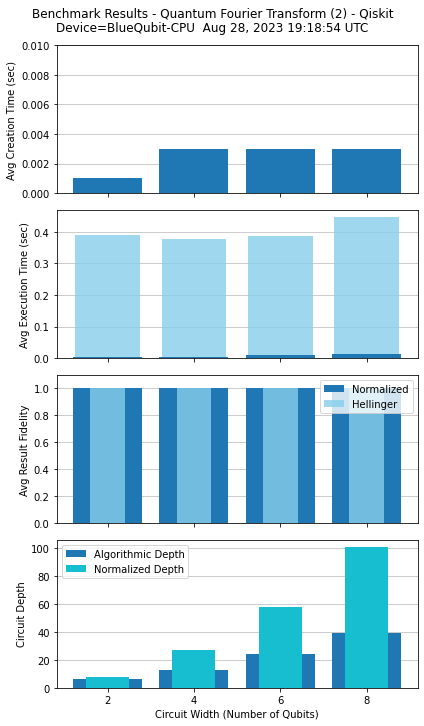

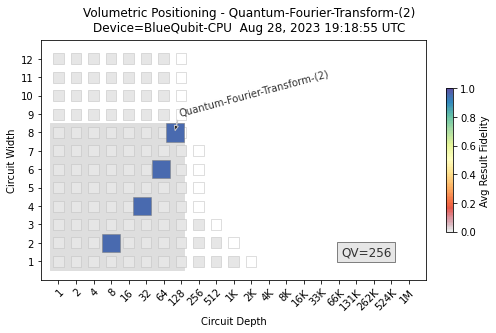

In [9]:
import sys
sys.path.insert(1, "quantum-fourier-transform/qiskit")
import qft_benchmark
qft_benchmark.run(min_qubits=min_qubits, max_qubits=max_qubits, skip_qubits=skip_qubits,
                max_circuits=max_circuits, num_shots=num_shots,
                method=2,
                backend_id=backend_id, provider_backend=provider_backend,
                hub=hub, group=group, project=project, exec_options=exec_options)

### Grover

Grover's Search Benchmark Program - Qiskit
... execution starting at Aug 28, 2023 19:18:56 UTC
************
Executing [1] circuits with num_qubits = 2


BQ-PYTHON-SDK - INFO - Submitted: Job ID: fliBThGIXOpYUWac, device: cpu, run status: RUNNING, created on: 2023-08-28 19:18:55 UTC, estimated runtime: 100 ms, estimated cost: $0.00, num qubits: 2
INFO:bluequbit-python-sdk:Submitted: Job ID: fliBThGIXOpYUWac, device: cpu, run status: RUNNING, created on: 2023-08-28 19:18:55 UTC, estimated runtime: 100 ms, estimated cost: $0.00, num qubits: 2


************
Average Circuit Algorithmic Depth, ξ (xi) for the 2 qubit group = 12, 0.125
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 2 qubit group = 13, 0.125, 2.0
Average Creation, Elapsed, Execution Time for the 2 qubit group = 0.002, 0.355, 0.004 secs
Average Hellinger, Normalized Fidelity for the 2 qubit group = 1.0, 1.0

************
Executing [1] circuits with num_qubits = 4


BQ-PYTHON-SDK - INFO - Submitted: Job ID: afGeKCvrZ6VAi63F, device: cpu, run status: RUNNING, created on: 2023-08-28 19:18:56 UTC, estimated runtime: 100 ms, estimated cost: $0.00, num qubits: 4
INFO:bluequbit-python-sdk:Submitted: Job ID: afGeKCvrZ6VAi63F, device: cpu, run status: RUNNING, created on: 2023-08-28 19:18:56 UTC, estimated runtime: 100 ms, estimated cost: $0.00, num qubits: 4


************
Average Circuit Algorithmic Depth, ξ (xi) for the 4 qubit group = 32, 0.073
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 4 qubit group = 168, 0.396, 84.0
Average Creation, Elapsed, Execution Time for the 4 qubit group = 0.004, 0.426, 0.012 secs
Average Hellinger, Normalized Fidelity for the 4 qubit group = 0.994, 0.993

************
Executing [1] circuits with num_qubits = 6


BQ-PYTHON-SDK - INFO - Submitted: Job ID: BbwGS8Uk37urnfpu, device: cpu, run status: RUNNING, created on: 2023-08-28 19:18:56 UTC, estimated runtime: 100 ms, estimated cost: $0.00, num qubits: 6
INFO:bluequbit-python-sdk:Submitted: Job ID: BbwGS8Uk37urnfpu, device: cpu, run status: RUNNING, created on: 2023-08-28 19:18:56 UTC, estimated runtime: 100 ms, estimated cost: $0.00, num qubits: 6


************
Average Circuit Algorithmic Depth, ξ (xi) for the 6 qubit group = 74, 0.054
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 6 qubit group = 1881, 0.473, 1104.0
Average Creation, Elapsed, Execution Time for the 6 qubit group = 0.008, 0.607, 0.03 secs
Average Hellinger, Normalized Fidelity for the 6 qubit group = 0.994, 0.994

************
Executing [1] circuits with num_qubits = 8


BQ-PYTHON-SDK - INFO - Submitted: Job ID: dKeYTc0mLHxd2Piu, device: cpu, run status: RUNNING, created on: 2023-08-28 19:19:00 UTC, estimated runtime: 100 ms, estimated cost: $0.00, num qubits: 8
INFO:bluequbit-python-sdk:Submitted: Job ID: dKeYTc0mLHxd2Piu, device: cpu, run status: RUNNING, created on: 2023-08-28 19:19:00 UTC, estimated runtime: 100 ms, estimated cost: $0.00, num qubits: 8


************
Average Circuit Algorithmic Depth, ξ (xi) for the 8 qubit group = 122, 0.049
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 8 qubit group = 15267, 0.493, 9120.0
Average Creation, Elapsed, Execution Time for the 8 qubit group = 0.019, 2.346, 0.066 secs
Average Hellinger, Normalized Fidelity for the 8 qubit group = 1.0, 1.0

... execution complete at Aug 28, 2023 19:19:03 UTC in 7.14 secs

Sample Circuit:
        ┌───┐ ░ ┌─────────┐┌───────────┐ ░ ┌─────────┐┌───────────┐ ░ »
q168_0: ┤ H ├─░─┤0        ├┤0          ├─░─┤0        ├┤0          ├─░─»
        ├───┤ ░ │         ││           │ ░ │         ││           │ ░ »
q168_1: ┤ H ├─░─┤1        ├┤1          ├─░─┤1        ├┤1          ├─░─»
        ├───┤ ░ │  oracle ││  diffuser │ ░ │  oracle ││  diffuser │ ░ »
q168_2: ┤ H ├─░─┤2        ├┤2          ├─░─┤2        ├┤2          ├─░─»
        ├───┤ ░ │         ││           │ ░ │         ││           │ ░ »
q168_3: ┤ H ├─░─┤3        ├┤3          ├─░─┤3        ├┤3     

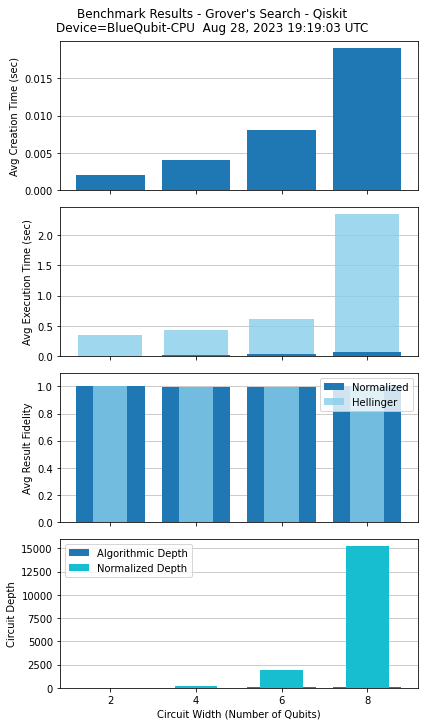

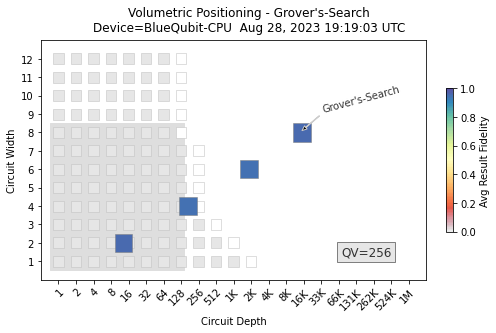

In [10]:
import sys
sys.path.insert(1, "grovers/qiskit")
import grovers_benchmark
grovers_benchmark.run(min_qubits=min_qubits, max_qubits=max_qubits, skip_qubits=skip_qubits,
                max_circuits=max_circuits, num_shots=num_shots,
                backend_id=backend_id, provider_backend=provider_backend,
                hub=hub, group=group, project=project, exec_options=exec_options)

### Phase Estimation

Phase Estimation Benchmark Program - Qiskit
... execution starting at Aug 28, 2023 19:19:04 UTC
************
Executing [1] circuits with num_qubits = 3


BQ-PYTHON-SDK - INFO - Submitted: Job ID: YOaPp7pWMWNI3i3c, device: cpu, run status: RUNNING, created on: 2023-08-28 19:19:04 UTC, estimated runtime: 100 ms, estimated cost: $0.00, num qubits: 3
INFO:bluequbit-python-sdk:Submitted: Job ID: YOaPp7pWMWNI3i3c, device: cpu, run status: RUNNING, created on: 2023-08-28 19:19:04 UTC, estimated runtime: 100 ms, estimated cost: $0.00, num qubits: 3


************
Average Circuit Algorithmic Depth, ξ (xi) for the 3 qubit group = 16, 0.316
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 3 qubit group = 19, 0.261, 6.0
Average Creation, Elapsed, Execution Time for the 3 qubit group = 0.007, 0.374, 0.006 secs
Average Hellinger, Normalized Fidelity for the 3 qubit group = 1.0, 1.0

************
Executing [1] circuits with num_qubits = 5


BQ-PYTHON-SDK - INFO - Submitted: Job ID: YeFccnekC3XLdw0H, device: cpu, run status: RUNNING, created on: 2023-08-28 19:19:04 UTC, estimated runtime: 100 ms, estimated cost: $0.00, num qubits: 5
INFO:bluequbit-python-sdk:Submitted: Job ID: YeFccnekC3XLdw0H, device: cpu, run status: RUNNING, created on: 2023-08-28 19:19:04 UTC, estimated runtime: 100 ms, estimated cost: $0.00, num qubits: 5


************
Average Circuit Algorithmic Depth, ξ (xi) for the 5 qubit group = 41, 0.377
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 5 qubit group = 42, 0.321, 18.0
Average Creation, Elapsed, Execution Time for the 5 qubit group = 0.015, 0.416, 0.012 secs
Average Hellinger, Normalized Fidelity for the 5 qubit group = 1.0, 1.0

************
Executing [1] circuits with num_qubits = 7


BQ-PYTHON-SDK - INFO - Submitted: Job ID: TtZb8c5UR1QMImpJ, device: cpu, run status: RUNNING, created on: 2023-08-28 19:19:05 UTC, estimated runtime: 100 ms, estimated cost: $0.00, num qubits: 7
INFO:bluequbit-python-sdk:Submitted: Job ID: TtZb8c5UR1QMImpJ, device: cpu, run status: RUNNING, created on: 2023-08-28 19:19:05 UTC, estimated runtime: 100 ms, estimated cost: $0.00, num qubits: 7


************
Average Circuit Algorithmic Depth, ξ (xi) for the 7 qubit group = 78, 0.408
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 7 qubit group = 85, 0.365, 42.0
Average Creation, Elapsed, Execution Time for the 7 qubit group = 0.008, 0.431, 0.023 secs
Average Hellinger, Normalized Fidelity for the 7 qubit group = 1.0, 1.0

... execution complete at Aug 28, 2023 19:19:06 UTC in 1.371 secs

Sample Circuit:
        ┌───┐ ░                              ░ ┌──────────┐ ░ ┌─┐         
q245_0: ┤ H ├─░─────────────────────────■────░─┤0         ├─░─┤M├─────────
        ├───┤ ░                         │    ░ │          │ ░ └╥┘┌─┐      
q245_1: ┤ H ├─░──────────────────■──────┼────░─┤1         ├─░──╫─┤M├──────
        ├───┤ ░                  │      │    ░ │  inv_qft │ ░  ║ └╥┘┌─┐   
q245_2: ┤ H ├─░───────────■──────┼──────┼────░─┤2         ├─░──╫──╫─┤M├───
        ├───┤ ░           │      │      │    ░ │          │ ░  ║  ║ └╥┘┌─┐
q245_3: ┤ H ├─░────■──────┼──────┼──────┼────

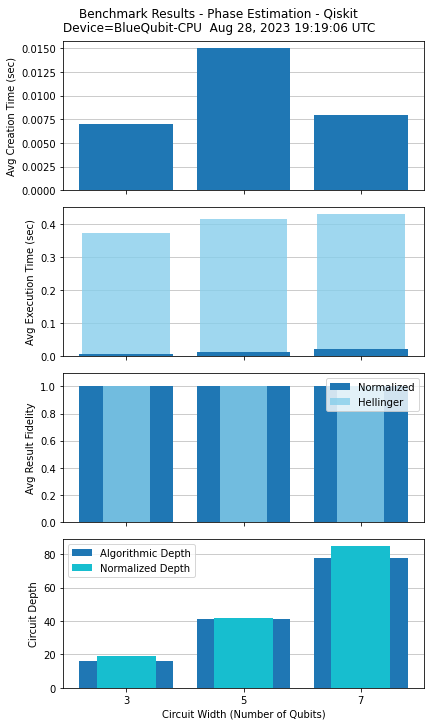

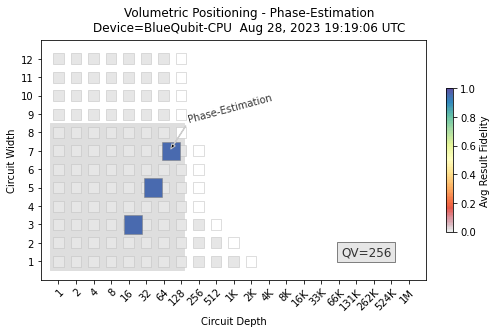

In [11]:
import sys
sys.path.insert(1, "phase-estimation/qiskit")
import pe_benchmark
pe_benchmark.run(min_qubits=min_qubits, max_qubits=max_qubits, skip_qubits=skip_qubits,
                max_circuits=max_circuits, num_shots=num_shots,
                backend_id=backend_id, provider_backend=provider_backend,
                hub=hub, group=group, project=project, exec_options=exec_options)

### HHL Linear Solver

In [12]:
import sys
sys.path.insert(1, "hhl/qiskit")
import hhl_benchmark

hhl_benchmark.verbose=False

hhl_benchmark.run(min_qubits=min_qubits, max_qubits=max_qubits, skip_qubits=skip_qubits,
                max_circuits=max_circuits, num_shots=num_shots,
                method=1, use_best_widths=True,
                backend_id=backend_id, provider_backend=provider_backend,
                hub=hub, group=group, project=project, exec_options=exec_options)

HHL Benchmark Program - Qiskit
... execution starting at Aug 28, 2023 19:19:07 UTC
************
Executing 1 circuits with 4 qubits, using 1 input qubits and 1 clock qubits
ERROR: Failed to execute circuit 4 1006
... exception = Job 7tnJCDZMDDC0tGQJ finished with status: FAILED_VALIDATION. Mid-circuit measurements are not supported. See https://app.bluequbit.io/docs for more details.
************
Executing 1 circuits with 6 qubits, using 1 input qubits and 3 clock qubits
ERROR: Failed to execute circuit 6 1006
... exception = Job 1V2kTTuvsOrLJzmC finished with status: FAILED_VALIDATION. Mid-circuit measurements are not supported. See https://app.bluequbit.io/docs for more details.
... execution complete at Aug 28, 2023 19:19:08 UTC in 0.993 secs

Sample Circuit:
         ┌───┐ ░ ┌───────────┐ ░          ░                           ░        »
  input: ┤ X ├─░─┤0          ├─░──────────░───────────────────────────░────────»
         └───┘ ░ │           │ ░          ░                       

### Amplitude Estimation

Amplitude Estimation Benchmark Program - Qiskit
... execution starting at Aug 28, 2023 19:19:08 UTC
************
Executing [1] circuits with num_qubits = 3


BQ-PYTHON-SDK - INFO - Submitted: Job ID: OgOBw0OTeSz4z7WH, device: cpu, run status: RUNNING, created on: 2023-08-28 19:19:08 UTC, estimated runtime: 100 ms, estimated cost: $0.00, num qubits: 3
INFO:bluequbit-python-sdk:Submitted: Job ID: OgOBw0OTeSz4z7WH, device: cpu, run status: RUNNING, created on: 2023-08-28 19:19:08 UTC, estimated runtime: 100 ms, estimated cost: $0.00, num qubits: 3


************
Average Circuit Algorithmic Depth, ξ (xi) for the 3 qubit group = 72, 0.422
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 3 qubit group = 61, 0.385, 30.0
Average Creation, Elapsed, Execution Time for the 3 qubit group = 0.01, 0.404, 0.012 secs
Average Hellinger, Normalized Fidelity for the 3 qubit group = 1.0, 1.0

************
Executing [1] circuits with num_qubits = 5


BQ-PYTHON-SDK - INFO - Submitted: Job ID: W9IwWg2KYCsfnKnp, device: cpu, run status: RUNNING, created on: 2023-08-28 19:19:09 UTC, estimated runtime: 100 ms, estimated cost: $0.00, num qubits: 5
INFO:bluequbit-python-sdk:Submitted: Job ID: W9IwWg2KYCsfnKnp, device: cpu, run status: RUNNING, created on: 2023-08-28 19:19:09 UTC, estimated runtime: 100 ms, estimated cost: $0.00, num qubits: 5


************
Average Circuit Algorithmic Depth, ξ (xi) for the 5 qubit group = 479, 0.436
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 5 qubit group = 363, 0.404, 188.0
Average Creation, Elapsed, Execution Time for the 5 qubit group = 0.02, 2.204, 0.057 secs
Average Hellinger, Normalized Fidelity for the 5 qubit group = 1.0, 1.0

************
Executing [1] circuits with num_qubits = 7


BQ-PYTHON-SDK - INFO - Submitted: Job ID: gHycf086YcmAx2t1, device: cpu, run status: RUNNING, created on: 2023-08-28 19:19:13 UTC, estimated runtime: 100 ms, estimated cost: $0.00, num qubits: 7
INFO:bluequbit-python-sdk:Submitted: Job ID: gHycf086YcmAx2t1, device: cpu, run status: RUNNING, created on: 2023-08-28 19:19:13 UTC, estimated runtime: 100 ms, estimated cost: $0.00, num qubits: 7


************
Average Circuit Algorithmic Depth, ξ (xi) for the 7 qubit group = 2086, 0.439
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 7 qubit group = 1701, 0.408, 868.0
Average Creation, Elapsed, Execution Time for the 7 qubit group = 0.072, 3.012, 0.242 secs
Average Hellinger, Normalized Fidelity for the 7 qubit group = 1.0, 1.0

... execution complete at Aug 28, 2023 19:19:15 UTC in 7.026 secs

Sample Circuit:
        ┌───┐                         ┌──────┐┌──────┐┌──────┐┌──────┐ ░ »
q347_0: ┤ H ├─────────────────────────┤0     ├┤0     ├┤0     ├┤0     ├─░─»
        ├───┤         ┌──────┐┌──────┐│      ││      ││      ││      │ ░ »
q347_1: ┤ H ├─────────┤0     ├┤0     ├┤      ├┤      ├┤      ├┤      ├─░─»
        ├───┤ ┌──────┐│      ││      ││      ││      ││      ││      │ ░ »
q347_2: ┤ H ├─┤0     ├┤      ├┤      ├┤  c_Q ├┤  c_Q ├┤  c_Q ├┤  c_Q ├─░─»
        ├───┴┐│      ││  c_Q ││  c_Q ││      ││      ││      ││      │ ░ »
q346_0: ┤0   ├┤1 c_Q ├┤1     ├┤1     ├┤1

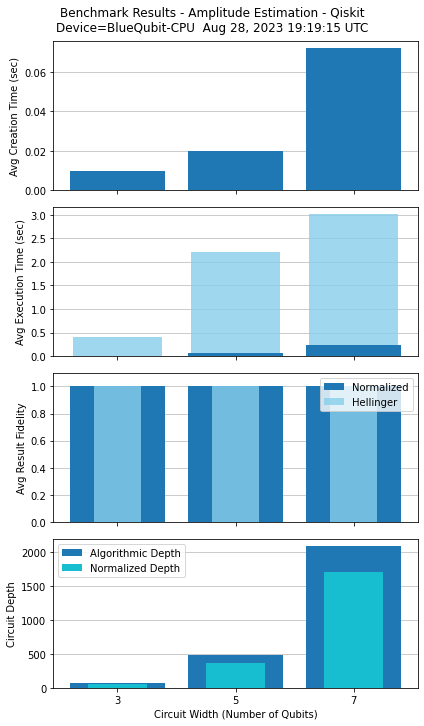

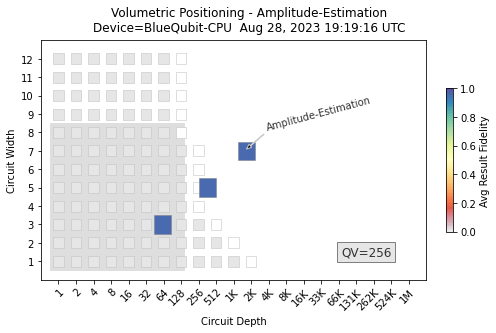

In [13]:
import sys
sys.path.insert(1, "amplitude-estimation/qiskit")
import ae_benchmark
ae_benchmark.run(min_qubits=min_qubits, max_qubits=max_qubits, skip_qubits=skip_qubits,
                max_circuits=max_circuits, num_shots=num_shots,
                backend_id=backend_id, provider_backend=provider_backend,
                hub=hub, group=group, project=project, exec_options=exec_options)

### Monte Carlo

Monte Carlo Sampling Benchmark Program - Qiskit
... using circuit method 2
... execution starting at Aug 28, 2023 19:19:17 UTC
************
Executing [1] circuits with num_qubits = 4


BQ-PYTHON-SDK - INFO - Submitted: Job ID: hsO25ot0jme3bYLH, device: cpu, run status: RUNNING, created on: 2023-08-28 19:19:17 UTC, estimated runtime: 100 ms, estimated cost: $0.00, num qubits: 4
INFO:bluequbit-python-sdk:Submitted: Job ID: hsO25ot0jme3bYLH, device: cpu, run status: RUNNING, created on: 2023-08-28 19:19:17 UTC, estimated runtime: 100 ms, estimated cost: $0.00, num qubits: 4


************
Average Circuit Algorithmic Depth, ξ (xi) for the 4 qubit group = 202, 0.398
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 4 qubit group = 208, 0.372, 96.0
Average Creation, Elapsed, Execution Time for the 4 qubit group = 0.018, 0.599, 0.042 secs
Average Hellinger, Normalized Fidelity for the 4 qubit group = 1.0, 0.999

************
Executing [1] circuits with num_qubits = 6


BQ-PYTHON-SDK - INFO - Submitted: Job ID: 3MMGVeRf9LfGBmb0, device: cpu, run status: RUNNING, created on: 2023-08-28 19:19:19 UTC, estimated runtime: 100 ms, estimated cost: $0.00, num qubits: 6
INFO:bluequbit-python-sdk:Submitted: Job ID: 3MMGVeRf9LfGBmb0, device: cpu, run status: RUNNING, created on: 2023-08-28 19:19:19 UTC, estimated runtime: 100 ms, estimated cost: $0.00, num qubits: 6


************
Average Circuit Algorithmic Depth, ξ (xi) for the 6 qubit group = 997, 0.402
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 6 qubit group = 1017, 0.38, 478.0
Average Creation, Elapsed, Execution Time for the 6 qubit group = 0.037, 2.167, 0.195 secs
Average Hellinger, Normalized Fidelity for the 6 qubit group = 0.999, 0.998

************
Executing [1] circuits with num_qubits = 8


BQ-PYTHON-SDK - INFO - Submitted: Job ID: VhGObSkWxBxB86kF, device: cpu, run status: RUNNING, created on: 2023-08-28 19:19:26 UTC, estimated runtime: 100 ms, estimated cost: $0.00, num qubits: 8
INFO:bluequbit-python-sdk:Submitted: Job ID: VhGObSkWxBxB86kF, device: cpu, run status: RUNNING, created on: 2023-08-28 19:19:26 UTC, estimated runtime: 100 ms, estimated cost: $0.00, num qubits: 8


************
Average Circuit Algorithmic Depth, ξ (xi) for the 8 qubit group = 4144, 0.403
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 8 qubit group = 4214, 0.382, 1984.0
Average Creation, Elapsed, Execution Time for the 8 qubit group = 0.114, 4.683, 0.791 secs
Average Hellinger, Normalized Fidelity for the 8 qubit group = 1.0, 1.0

... execution complete at Aug 28, 2023 19:19:29 UTC in 11.676 secs

Sample Circuit:
        ┌────┐┌──────┐┌──────┐┌──────┐ ░              ░       
q382_0: ┤0   ├┤1     ├┤1     ├┤1     ├─░──────────────░───────
        │  A ││      ││      ││      │ ░              ░       
q382_1: ┤1   ├┤2     ├┤2 c_Q ├┤2 c_Q ├─░──────────────░───────
        ├───┬┘│  c_Q ││      ││      │ ░ ┌──────────┐ ░ ┌─┐   
q383_0: ┤ H ├─┤      ├┤0     ├┤0     ├─░─┤0         ├─░─┤M├───
        ├───┤ │      │└──────┘└──────┘ ░ │  inv_qft │ ░ └╥┘┌─┐
q383_1: ┤ H ├─┤0     ├─────────────────░─┤1         ├─░──╫─┤M├
        └───┘ └──────┘                 ░ └──────────┘ ░  ║ 

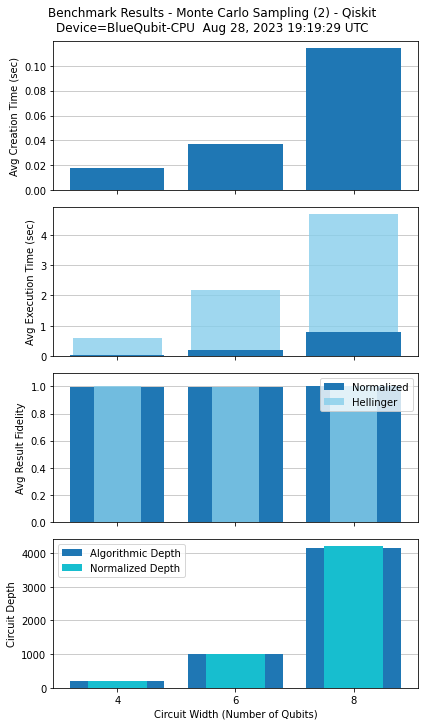

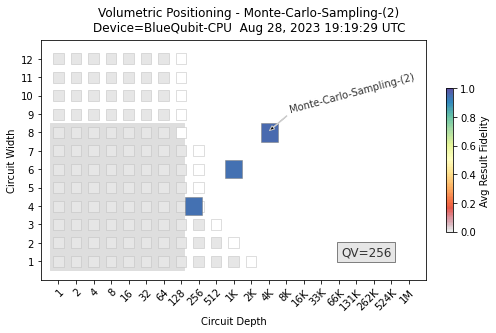

In [14]:
import sys
sys.path.insert(1, "monte-carlo/qiskit")
import mc_benchmark
mc_benchmark.run(min_qubits=min_qubits, max_qubits=max_qubits, skip_qubits=skip_qubits,
                max_circuits=max_circuits, num_shots=num_shots,
                backend_id=backend_id, provider_backend=provider_backend,
                hub=hub, group=group, project=project, exec_options=exec_options)

### Hamiltonian Simulation

Hamiltonian-Simulation Benchmark Program - Qiskit
... execution starting at Aug 28, 2023 19:19:30 UTC
************
Executing [1] circuits with num_qubits = 2


BQ-PYTHON-SDK - INFO - Submitted: Job ID: JBSqk5qCXTZSJhos, device: cpu, run status: RUNNING, created on: 2023-08-28 19:19:30 UTC, estimated runtime: 100 ms, estimated cost: $0.00, num qubits: 2
INFO:bluequbit-python-sdk:Submitted: Job ID: JBSqk5qCXTZSJhos, device: cpu, run status: RUNNING, created on: 2023-08-28 19:19:30 UTC, estimated runtime: 100 ms, estimated cost: $0.00, num qubits: 2


************
Average Circuit Algorithmic Depth, ξ (xi) for the 2 qubit group = 29, 0.243
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 2 qubit group = 29, 0.243, 9.0
Average Creation, Elapsed, Execution Time for the 2 qubit group = 0.002, 0.625, 0.006 secs
Average Hellinger, Normalized Fidelity for the 2 qubit group = 1.0, 1.0

************
Executing [1] circuits with num_qubits = 4


BQ-PYTHON-SDK - INFO - Submitted: Job ID: FR8Km79r3voqt1AX, device: cpu, run status: RUNNING, created on: 2023-08-28 19:19:30 UTC, estimated runtime: 100 ms, estimated cost: $0.00, num qubits: 4
INFO:bluequbit-python-sdk:Submitted: Job ID: FR8Km79r3voqt1AX, device: cpu, run status: RUNNING, created on: 2023-08-28 19:19:30 UTC, estimated runtime: 100 ms, estimated cost: $0.00, num qubits: 4


************
Average Circuit Algorithmic Depth, ξ (xi) for the 4 qubit group = 50, 0.276
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 4 qubit group = 44, 0.293, 27.0
Average Creation, Elapsed, Execution Time for the 4 qubit group = 0.004, 0.421, 0.012 secs
Average Hellinger, Normalized Fidelity for the 4 qubit group = 0.999, 0.998

************
Executing [1] circuits with num_qubits = 6


BQ-PYTHON-SDK - INFO - Submitted: Job ID: Cy0sYflrKv0zsbXq, device: cpu, run status: RUNNING, created on: 2023-08-28 19:19:31 UTC, estimated runtime: 100 ms, estimated cost: $0.00, num qubits: 6
INFO:bluequbit-python-sdk:Submitted: Job ID: Cy0sYflrKv0zsbXq, device: cpu, run status: RUNNING, created on: 2023-08-28 19:19:31 UTC, estimated runtime: 100 ms, estimated cost: $0.00, num qubits: 6


************
Average Circuit Algorithmic Depth, ξ (xi) for the 6 qubit group = 50, 0.283
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 6 qubit group = 44, 0.306, 45.0
Average Creation, Elapsed, Execution Time for the 6 qubit group = 0.012, 0.451, 0.017 secs
Average Hellinger, Normalized Fidelity for the 6 qubit group = 0.996, 0.996

************
Executing [1] circuits with num_qubits = 8


BQ-PYTHON-SDK - INFO - Submitted: Job ID: cUxfkvHbP1Z2cYay, device: cpu, run status: RUNNING, created on: 2023-08-28 19:19:31 UTC, estimated runtime: 100 ms, estimated cost: $0.00, num qubits: 8
INFO:bluequbit-python-sdk:Submitted: Job ID: cUxfkvHbP1Z2cYay, device: cpu, run status: RUNNING, created on: 2023-08-28 19:19:31 UTC, estimated runtime: 100 ms, estimated cost: $0.00, num qubits: 8


************
Average Circuit Algorithmic Depth, ξ (xi) for the 8 qubit group = 50, 0.286
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 8 qubit group = 44, 0.312, 63.0
Average Creation, Elapsed, Execution Time for the 8 qubit group = 0.009, 0.502, 0.02 secs
Average Hellinger, Normalized Fidelity for the 8 qubit group = 0.993, 0.993

... execution complete at Aug 28, 2023 19:19:32 UTC in 2.259 secs

Sample Circuit:
        ┌───┐ ░ ┌───────────────┐ ┌──────────────┐ ░ ┌─────────────┐»
q455_0: ┤ X ├─░─┤ Rx(-0.025609) ├─┤ Rz(0.009192) ├─░─┤0            ├»
        └───┘ ░ ├───────────────┤┌┴──────────────┤ ░ │  xxyyzz_opt │»
q455_1: ──────░─┤ Rx(0.0025855) ├┤ Rz(-0.057871) ├─░─┤1            ├»
        ┌───┐ ░ └┬──────────────┤└┬──────────────┤ ░ ├─────────────┤»
q455_2: ┤ X ├─░──┤ Rx(0.035773) ├─┤ Rz(0.051748) ├─░─┤0            ├»
        └───┘ ░  ├──────────────┤ ├──────────────┤ ░ │  xxyyzz_opt │»
q455_3: ──────░──┤ Rx(0.038563) ├─┤ Rz(0.057288) ├─░─┤1            ├»
       

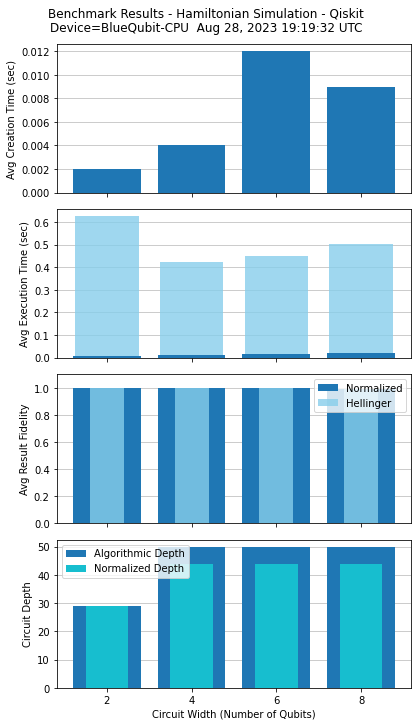

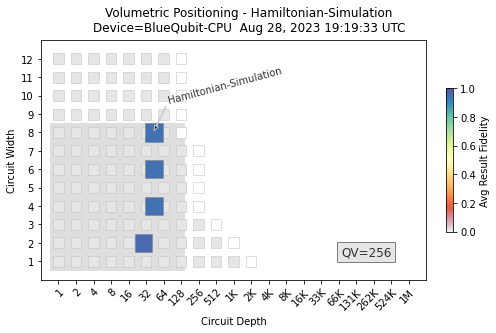

In [15]:
import sys
sys.path.insert(1, "hamiltonian-simulation/qiskit")
import hamiltonian_simulation_benchmark
hamiltonian_simulation_benchmark.run(min_qubits=min_qubits, max_qubits=max_qubits, skip_qubits=skip_qubits,
                max_circuits=max_circuits, num_shots=num_shots,
                backend_id=backend_id, provider_backend=provider_backend,
                hub=hub, group=group, project=project, exec_options=exec_options)

### VQE - Method 1

Variational Quantum Eigensolver Benchmark Program - Qiskit
... using circuit method 1
... execution starting at Aug 28, 2023 19:19:34 UTC
************
Executing [1] circuits with num_qubits = 4


BQ-PYTHON-SDK - INFO - Submitted: Job ID: ubMHEjoxAfWYMRSm, device: cpu, run status: RUNNING, created on: 2023-08-28 19:19:33 UTC, estimated runtime: 100 ms, estimated cost: $0.00, num qubits: 4
INFO:bluequbit-python-sdk:Submitted: Job ID: ubMHEjoxAfWYMRSm, device: cpu, run status: RUNNING, created on: 2023-08-28 19:19:33 UTC, estimated runtime: 100 ms, estimated cost: $0.00, num qubits: 4


************
Average Circuit Algorithmic Depth, ξ (xi) for the 4 qubit group = 5, 0.0
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 4 qubit group = 76, 0.533, 56.0
Average Creation, Elapsed, Execution Time for the 4 qubit group = 0.004, 0.443, 0.015 secs
Average Hellinger, Normalized Fidelity for the 4 qubit group = 1.0, 1.0

************
Executing [1] circuits with num_qubits = 6


BQ-PYTHON-SDK - INFO - Submitted: Job ID: 68Hm3dcyUwx3K8Uh, device: cpu, run status: RUNNING, created on: 2023-08-28 19:19:34 UTC, estimated runtime: 100 ms, estimated cost: $0.00, num qubits: 6
INFO:bluequbit-python-sdk:Submitted: Job ID: 68Hm3dcyUwx3K8Uh, device: cpu, run status: RUNNING, created on: 2023-08-28 19:19:34 UTC, estimated runtime: 100 ms, estimated cost: $0.00, num qubits: 6


************
Average Circuit Algorithmic Depth, ξ (xi) for the 6 qubit group = 10, 0.0
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 6 qubit group = 341, 0.63, 272.0
Average Creation, Elapsed, Execution Time for the 6 qubit group = 0.01, 0.912, 0.062 secs
Average Hellinger, Normalized Fidelity for the 6 qubit group = 0.999, 0.999

************
Executing [1] circuits with num_qubits = 8


BQ-PYTHON-SDK - INFO - Submitted: Job ID: BsCInDUquo6nuFbD, device: cpu, run status: RUNNING, created on: 2023-08-28 19:19:37 UTC, estimated runtime: 100 ms, estimated cost: $0.00, num qubits: 8
INFO:bluequbit-python-sdk:Submitted: Job ID: BsCInDUquo6nuFbD, device: cpu, run status: RUNNING, created on: 2023-08-28 19:19:37 UTC, estimated runtime: 100 ms, estimated cost: $0.00, num qubits: 8


************
Average Circuit Algorithmic Depth, ξ (xi) for the 8 qubit group = 26, 0.0
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 8 qubit group = 1543, 0.692, 1280.0
Average Creation, Elapsed, Execution Time for the 8 qubit group = 0.032, 3.292, 0.215 secs
Average Hellinger, Normalized Fidelity for the 8 qubit group = 0.997, 0.997

... execution complete at Aug 28, 2023 19:19:39 UTC in 5.451 secs

Sample Circuit:
        ┌─────┐┌────────────────────┐┌────────────────────┐»
q509_0: ┤0    ├┤0                   ├┤0                   ├»
        │     ││                    ││                    │»
q509_1: ┤1    ├┤1                   ├┤1                   ├»
        │  Hf ││  Cluster Op (0, 1) ││  Cluster Op (2, 3) │»
q509_2: ┤2    ├┤2                   ├┤2                   ├»
        │     ││                    ││                    │»
q509_3: ┤3    ├┤3                   ├┤3                   ├»
        └─────┘└────────────────────┘└────────────────────┘»
meas: 4/═══════

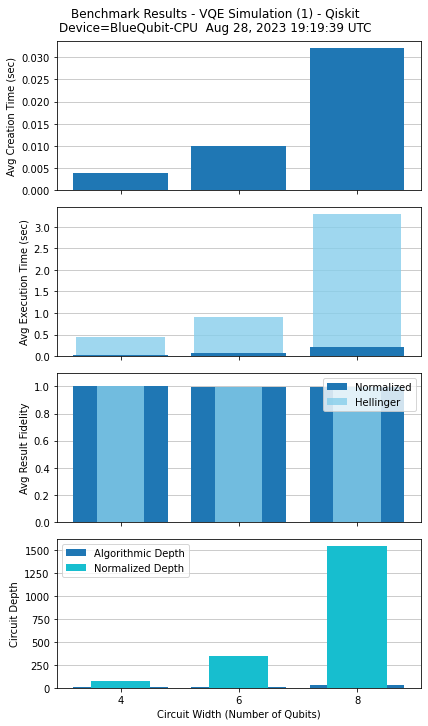

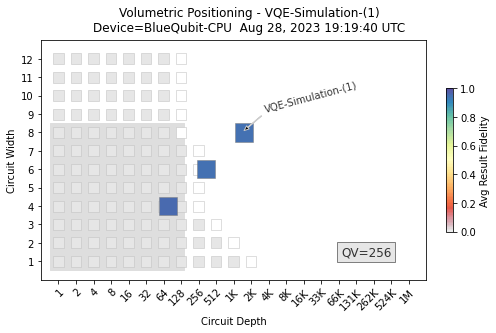

In [16]:
import sys
sys.path.insert(1, "vqe/qiskit")
import vqe_benchmark
vqe_num_shots=4098
vqe_benchmark.run(min_qubits=min_qubits, max_qubits=max_qubits,
                max_circuits=max_circuits, num_shots=vqe_num_shots,
                method=1,
                backend_id=backend_id, provider_backend=provider_backend,
                hub=hub, group=group, project=project, exec_options=exec_options)

### Shor - Method 1

In [17]:
import sys
sys.path.insert(1, "shors/qiskit")
import shors_benchmark
shors_benchmark.run(min_qubits=min_qubits, max_qubits=max_qubits, max_circuits=1, num_shots=num_shots,
                method=1,
                backend_id=backend_id, provider_backend=provider_backend,
                hub=hub, group=group, project=project, exec_options=exec_options)

Shor's Order Finding Algorithm Benchmark - Qiskit
... using circuit method 1
Max number of qubits 8 is too low to run method 1 of Shor's Order Finding


### Shor - Method 2

In [18]:
import sys
sys.path.insert(1, "shors/qiskit")
import shors_benchmark
shors_benchmark.run(min_qubits=min_qubits, max_qubits=max_qubits, max_circuits=1, num_shots=num_shots,
                method=2,
                backend_id=backend_id, provider_backend=provider_backend,
                hub=hub, group=group, project=project, exec_options=exec_options)

Shor's Order Finding Algorithm Benchmark - Qiskit
... using circuit method 2
... execution starting at Aug 28, 2023 19:19:41 UTC
************
Executing [1] circuits with num_qubits = 7
ERROR: Failed to execute circuit 7 (3, 2)
... exception = Job MtPUtvcyacxiMY2H finished with status: FAILED_VALIDATION. Mid-circuit measurements are not supported. See https://app.bluequbit.io/docs for more details.
... execution complete at Aug 28, 2023 19:19:45 UTC in 3.566 secs

Sample Circuit:
              ░  ┌───┐ ┌───┐┌──────────┐┌──────┐┌───┐┌─┐┌─┐ ░  ┌───┐ ┌───┐»
  q536: ──────░──┤ X ├─┤ H ├┤0         ├┤ P(0) ├┤ H ├┤M├┤M├─░──┤ X ├─┤ H ├»
        ┌───┐ ░  └─╥─┘ └───┘│          │└──╥───┘└───┘└╥┘└╥┘ ░  └─╥─┘ └───┘»
q537_0: ┤ X ├─░────╫────────┤1         ├───╫──────────╫──╫──░────╫────────»
        └───┘ ░    ║        │          │   ║          ║  ║  ░    ║        »
q537_1: ──────░────╫────────┤2         ├───╫──────────╫──╫──░────╫────────»
              ░    ║        │          │   ║          ║  ║  

### Combined Benchmark Results

****** NO RESULTS for HHL ****** 
****** NO RESULTS for Shor's Order Finding (2) ****** 


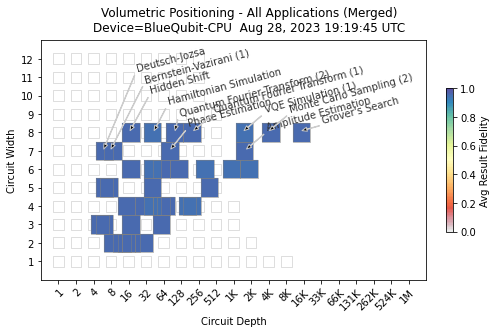

In [19]:
import sys
sys.path.insert(1, "_common")
import metrics

# metrics.depth_base = 2
# metrics.QV = 0
# apps = [ "Hidden Shift", "Grover's Search", "Quantum Fourier Transform (1)", "Hamiltonian Simulation" ]
# backend_id='qasm_simulator'

metrics.QV = 0

metrics.plot_all_app_metrics(backend_id, do_all_plots=False, include_apps=None)